In [104]:
import apiclient.discovery
from oauth2client.service_account import ServiceAccountCredentials
import httplib2
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.offline as pyo
pyo.init_notebook_mode()
import matplotlib.pyplot as plt


import import_ipynb # позволяет загружать другой ноутбук в касестве библиотеки
# ___________________________________________________
from main_table import main_table
from sector_margin import sector_margin
from quality import quality
from wacc_gordon import gordon_wacc
from price_divs_book_value import price_divs_book_value
from fcf_r_squared import fcf_r_squared
from div_stability import div_stability
from scored_news import scored_news
from costs_structure import costs_structure
from dividend_pershare_plot import dividend_pershare_plot
from book_value_years_plot import book_value_years_plot
from FCF_plot import FCF_plot
from revenue_plot import revenue_plot
from net_income_plot import net_income_plot
from moving_average_plot import moving_average_plot
from div_r_squared import div_r_squared


LIST = 'Russell_3000_NEW'

# Компания 

In [105]:
COMPANY = 'INTC'

# Запускаем рассчет маржи по сектору, и записываем его в файл csv

In [106]:
# sector_margin_company = sector_margin(100)
# sector_margin_company = pd.DataFrame(sector_margin_company)
# pd.to_pickle(sector_margin_company, "sector_margin.pkl")

# Читаем маржу по сектору из файла

In [107]:
sector_margin_company = pd.read_pickle("sector_margin.pkl")
sector_margin_company = pd.DataFrame(sector_margin_company)
sector_margin_company

Technology  \
Gross Margin       [39.25631050006685, 68.40388148014304, 55.1707...   
Operating Margin   [28.43893298633433, 32.64024032772884, 20.3889...   
Net Profit Margin  [22.358747944947353, 24.30833169611788, 18.763...   

                                                   Consumer Cyclical  \
Gross Margin       [20.991465602133335, 21.46787681847002, 44.829...   
Operating Margin   [2.6831545945416897, -39.61713842188818, 14.39...   
Net Profit Margin  [1.71757546003437, -42.12278602021566, 10.9964...   

                                                         Industrials  \
Gross Margin       [42.752582218989836, 71.18492834731079, 43.587...   
Operating Margin   [19.314777886499993, 31.81275505227319, 14.633...   
Net Profit Margin  [13.844218065045148, 21.17560813575361, 10.082...   

                                                     Basic Materials  \
Gross Margin       [13.070423601128834, 87.17475990238806, 20.774...   
Operating Margin   [7.09607384242447, 43.29613744612075, 15.22017...   
Net Profit Margin  [4.109491784176619, 17.623498090839146, -5.455...   

                                              Communication Services  \
Gross Margin       [60.886194876203035, 64.67235713838375, 33.582...   
Operating Margin   [26.58470245578341, 20.50606647217422, 7.75568...   
Net Profit Margin  [22.08507969076833, 12.251164297627087, 4.8019...   

                                                  Consumer Defensive  \
Gross Margin       [53.9242981992102, 12.891766431750156, 37.9067...   
Operating Margin   [14.774440494513625, 3.0211700406123585, 12.80...   
Net Profit Margin  [10.657915636307965, 2.024531051584443, 11.070...   

                                                          Healthcare  \
Gross Margin       [82.15876194286409, 3446.7112846770206, 69.980...   
Operating Margin   [36.93957935675065, 62.25677517188151, 34.5216...   
Net Profit Margin  [27.565215816571754, 684.5238093690866, 26.903...   

                                                         Real Estate  \
Gross Margin       [49.375636931809375, 72.52146782484672, 72.213...   
Operating Margin   [17.888428782269923, 13.911588269176889, 24.16...   
Net Profit Margin  [4.116717916788462, 9.394249993954386, -6.4243...   

                                                           Utilities  \
Gross Margin       [60.623906806223474, 39.2468827530929, 89.4968...   
Operating Margin   [14.69314792103265, 17.629005076729147, 17.387...   
Net Profit Margin  [8.133260503590206, 9.353118440115631, 11.9406...   

                                                  Financial Services  \
Gross Margin       [0.0, 0.0, 0.0, 97.92780395579477, 69.99577865...   
Operating Margin   [59.11648624168839, 44.598737556632564, 10.818...   
Net Profit Margin  [46.78006912891839, 30.585914343713693, 6.7942...   

                                                            Services  \
Gross Margin       [60.886194876203035, 64.67235713838375, 33.582...   
Operating Margin   [26.58470245578341, 20.50606647217422, 7.75568...   
Net Profit Margin  [22.08507969076833, 12.251164297627087, 4.8019...   

                                                              Energy  
Gross Margin       [35.36548770650949, 11.77261199091794, 35.3123...  
Operating Margin   [10.548488007031665, 4.724910242520268, 2.8153...  
Net Profit Margin  [-6.551193201597128, 4.010950088398555, -9.647...

# Создаем основную таблицу

In [108]:
try:
    work_table = main_table(COMPANY)
 # _________________Выводим константы__________________

    PRICE = round(work_table['price'][0], 2)
    company_profile_beta = work_table['beta'][0]
    sector_company = work_table['sector'][0]
    year_len = work_table['year_len'][0] - 1
    LTGrowth = 0.02
    LTdis = 0.08

except:
    work_table = 'NaN'
    PRICE = 'NaN'

Создаем основную таблицу для: INTC


# Оцениваем истинную стоимость расчет WACC

In [109]:
try:
    Gordon, WACC, PRICE_model, current_PRICE, FCF_List_plot, ke = gordon_wacc(work_table, LTGrowth, LTdis, PRICE)

except:
    Gordon, WACC, PRICE_model, current_PRICE, FCF_List_plot = 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'
    
print(f'WACC {WACC}')
print(f'Gordon price {Gordon}')
print(f'PRICE_model FCF regresion {PRICE_model}')
print(f'current market PRICE {current_PRICE}')
print(f'KE {ke}')

Расчет показателей Gordon, WACC, spl_num, PRICE_model
WACC 0.04796003613257473
Gordon price 17.68809822265499
PRICE_model FCF regresion 118.18
current market PRICE 50.47
KE 0.0514738429467524


# Расчет показателя качества (наша оценка)

In [110]:
try:
    quality_rating, gross_margin, operating_margin, net_profit_margin, revenue_growth, use_of_profit, EPS_growth, debt_level, ROE_DuPont, ROA \
    = quality(work_table, year_len, sector_margin_company, sector_company)
except:
    quality_rating, gross_margin, operating_margin, net_profit_margin, revenue_growth, use_of_profit, EPS_growth, debt_level, ROE_DuPont, ROA \
    = 'NaN', 'NaN', 'NaN', 'NaN'

print(f'gross_margin: {gross_margin}')
print(f'operating_margin: {operating_margin}')
print(f'net_profit_margin: {net_profit_margin}')
print(f'revenue_growth: {revenue_growth}')
print(f'use_of_profit: {use_of_profit}')
print(f'EPS_growth: {EPS_growth}')
print(f'debt_level: {debt_level}')
print(f'ROE_DuPont: {ROE_DuPont}')
print(f'ROA: {ROA}')
print(f'TOTAL score: {quality_rating}')

РАСЧЕТ ПОКАЗАТЕЛЕЙ КАЧЕСТВА (оценка)
gross_margin: 62.0
operating_margin: 28.000000000000004
net_profit_margin: 22.0
revenue_growth: 7.218923758363963
use_of_profit: 5.74
EPS_growth: 13.38008784482073
debt_level: 0.38
ROE_DuPont: 0.21547
ROA: 0.13
TOTAL score: 15


# Стоимость акции по дивам и балансовой стоимости( с помощью CAGR)

In [111]:
try:
    price_divs_book_value_CIGR = price_divs_book_value(work_table)
except:
    price_divs_book_value_CIGR = 'NaN'
    

print(f'price_CIGR: {price_divs_book_value_CIGR}')
print(f'current_PRICE: {PRICE}')

Стоимость акции по дивам и балансовой стоимости (наивный метод)
price_CIGR: 42.38
current_PRICE: 50.47


# Расчет стабильности выплат дивидендов

In [112]:
try:
    DSI, F_score, Aggregate_score = div_stability(work_table)
except:
    DSI, F_score, Aggregate_score = 'NaN', 'NaN', 'NaN'

    
print(f'DSI: {DSI}')
print(f'F_score: {F_score}')
print(f'Aggregate_score: {Aggregate_score}')


Расчет стабильности выплат дивидендов
DSI: 0.5
F_score: 5
Aggregate_score: 2.5


# Оценка дисперсии модели линейной регресси дивов через R-Squared

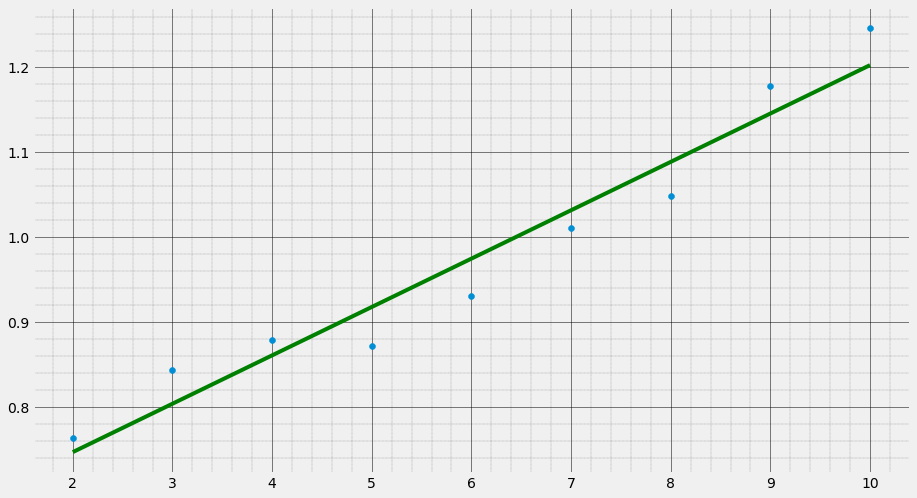

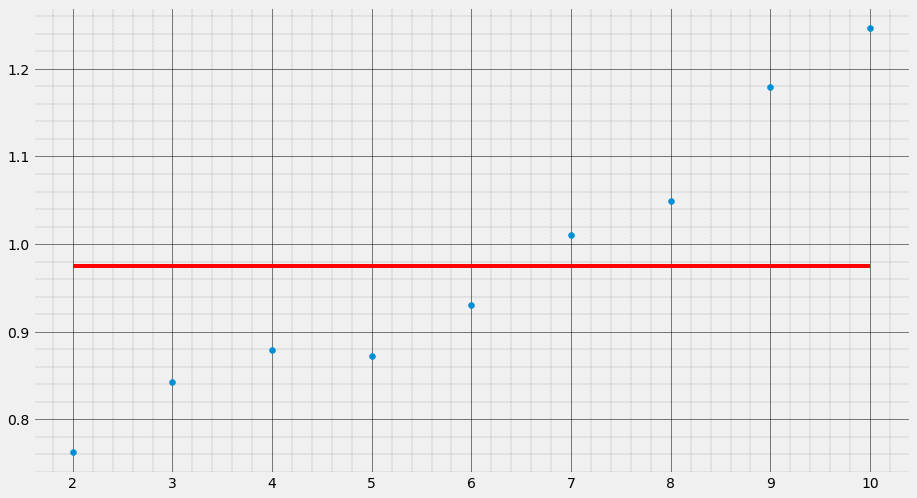

**************************************************
The rsquared value div is: 0.9458071080908824


In [113]:
div_r_squared = div_r_squared(work_table, year_len)
print('*'*50)
print(f'The rsquared value div is: {div_r_squared}')

In [114]:
print(work_table['freeCashFlow'])
print(work_table)

0    2.032400e+10
1    1.693200e+10
2    1.425100e+10
3    1.033200e+10
4    1.218300e+10
5    1.157100e+10
6    1.022100e+10
7    1.002900e+10
8    7.042000e+09
9    1.013300e+10
Name: freeCashFlow, dtype: float64
         date      revenue  operatingIncome    netIncome      eps  \
0  2019-12-28  71965000000      22035000000  21048000000  4.70557   
1  2018-12-29  70848000000      23316000000  21053000000  4.47841   
2  2017-12-30  62761000000      18050000000   9601000000  1.98573   
3  2016-12-31  59387000000      13133000000  10316000000  2.11610   
4  2015-12-26  55355000000      14002000000  11420000000  2.33347   
5  2014-12-27  55870000000      15347000000  11704000000  2.31487   
6  2013-12-28  52708000000      12291000000   9620000000  1.88738   
7  2012-12-29  53341000000      14638000000  11005000000  2.13275   
8  2011-12-31  53999000000      17345000000  12942000000  2.39179   
9  2010-12-25  43623000000      15463000000  11464000000  2.01264   

        ebitda  depreciat

# Оценка дисперсии модели линейной регресси FCF через R-Squared

Оценка дисперсии модели линейной регресси FCF через R-Squared


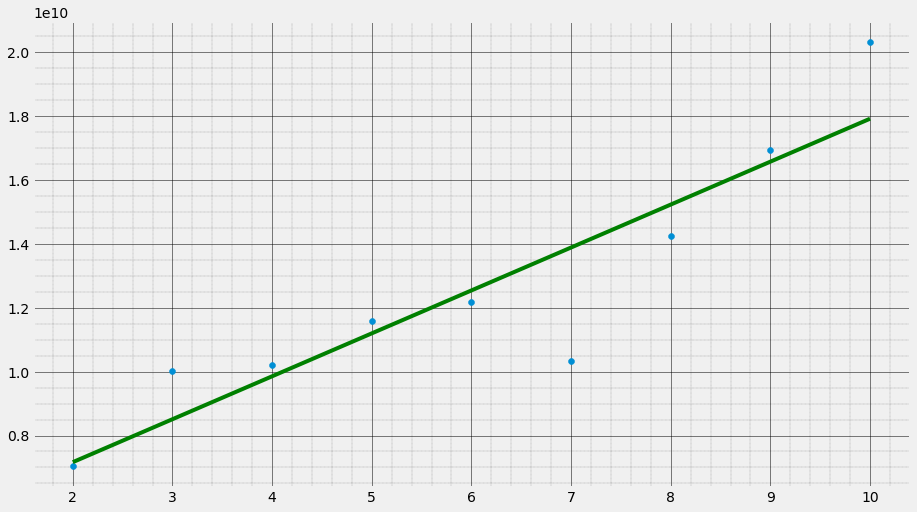

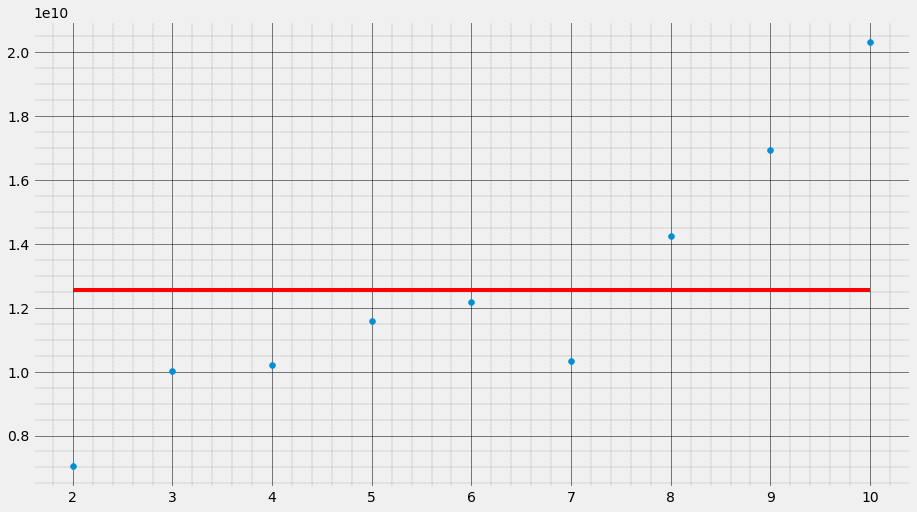

**************************************************
The rsquared value FCF is: 0.8298505606799045


In [115]:
fcf_r_squared_value = fcf_r_squared(work_table, year_len)
print('*'*50)
print(f'The rsquared value FCF is: {fcf_r_squared_value}')

In [116]:
print(work_table)

         date      revenue  operatingIncome    netIncome      eps  \
0  2019-12-28  71965000000      22035000000  21048000000  4.70557   
1  2018-12-29  70848000000      23316000000  21053000000  4.47841   
2  2017-12-30  62761000000      18050000000   9601000000  1.98573   
3  2016-12-31  59387000000      13133000000  10316000000  2.11610   
4  2015-12-26  55355000000      14002000000  11420000000  2.33347   
5  2014-12-27  55870000000      15347000000  11704000000  2.31487   
6  2013-12-28  52708000000      12291000000   9620000000  1.88738   
7  2012-12-29  53341000000      14638000000  11005000000  2.13275   
8  2011-12-31  53999000000      17345000000  12942000000  2.39179   
9  2010-12-25  43623000000      15463000000  11464000000  2.01264   

        ebitda  depreciationAndAmortization  interestExpense  incomeBeforeTax  \
0  35373000000                  10826000000        489000000      24058000000   
1  32870000000                   9085000000        468000000      23317000000 

# ВИЗУАЛИЗАЦИЯ

# Распределение маржинальностей

In [117]:
overview_Gross_Margin = sector_margin_company[sector_company]['Gross Margin']
overview_Operating_Margin = sector_margin_company[sector_company]['Operating Margin']
overview_Net_Profit_Margin = sector_margin_company[sector_company]['Net Profit Margin']

hist_data = [overview_Gross_Margin, overview_Operating_Margin, overview_Net_Profit_Margin]

group_labels = ['Gross Margin', 'Operating Margin', 'Net Profit Margin']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.update_layout(
    title="Распределение маржинальностей",
    title_x = 0.5,
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

# fig.append_trace({'x':gross_margin,'y':gross_margin,'type':'scatter','name':'Price'},1,1)

# fig.append_trace({'x':df.Time,'y':df.Close,'type':'scatter','name':'Price'},1,1)

fig.show()

### Net Income in Last 10 Years

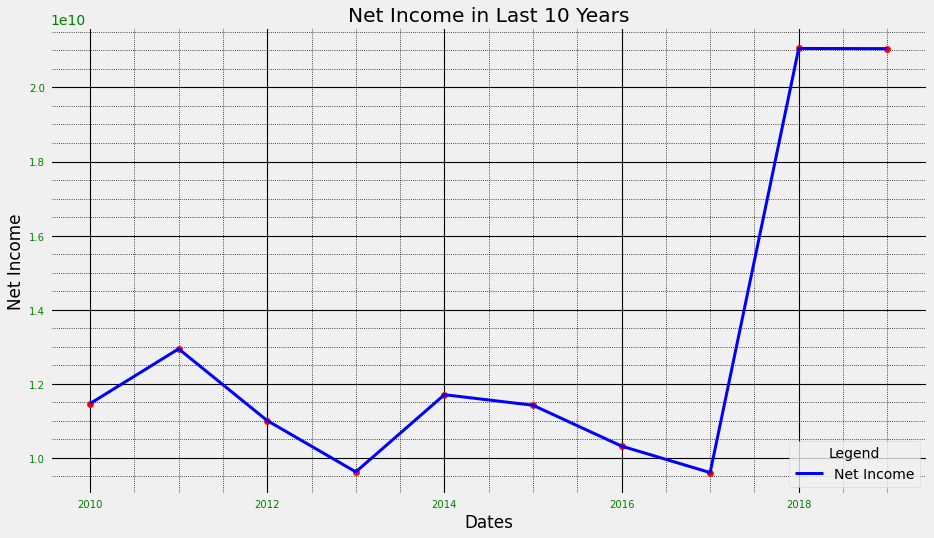

In [118]:
net_income_plot(work_table)

# Revenue in Last 10 Years

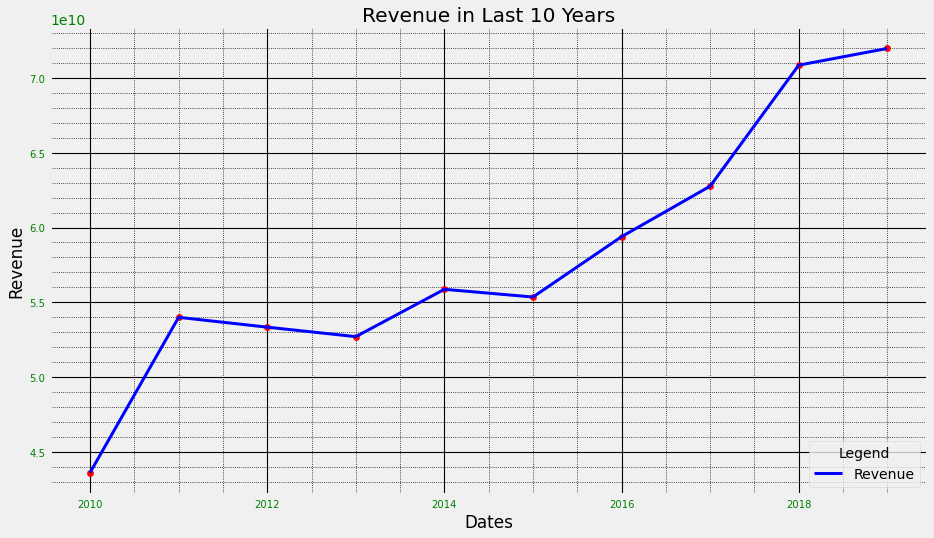

In [119]:
revenue_plot(work_table)

# FCF in Last 10 Years

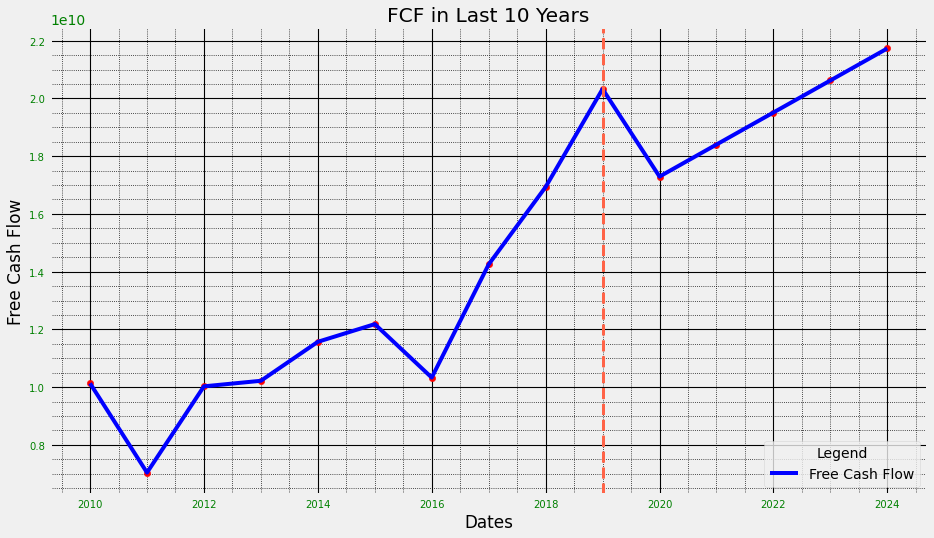

In [120]:
FCF_plot(work_table, FCF_List_plot)

# Book Value in Last 10 Years

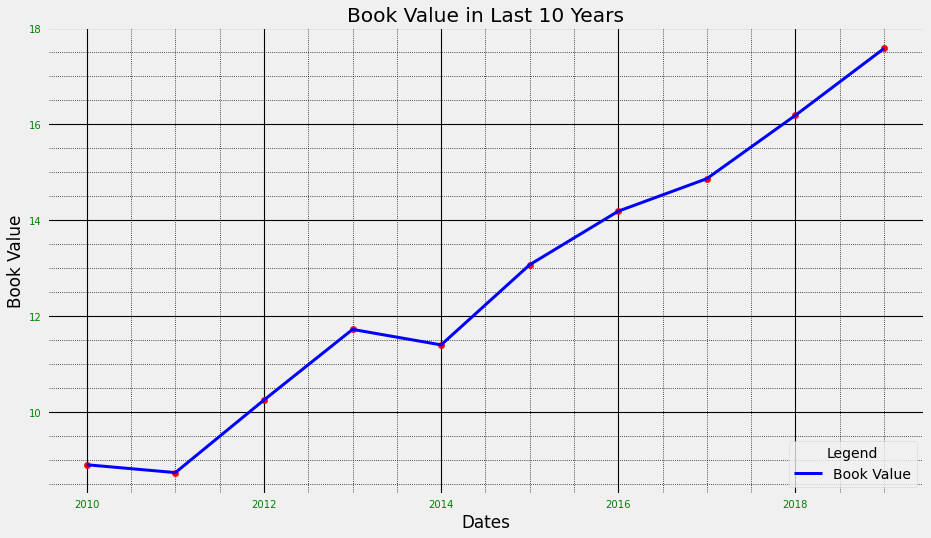

In [121]:
book_value_years_plot(work_table)

# Dividend per Share in Last 10 Years

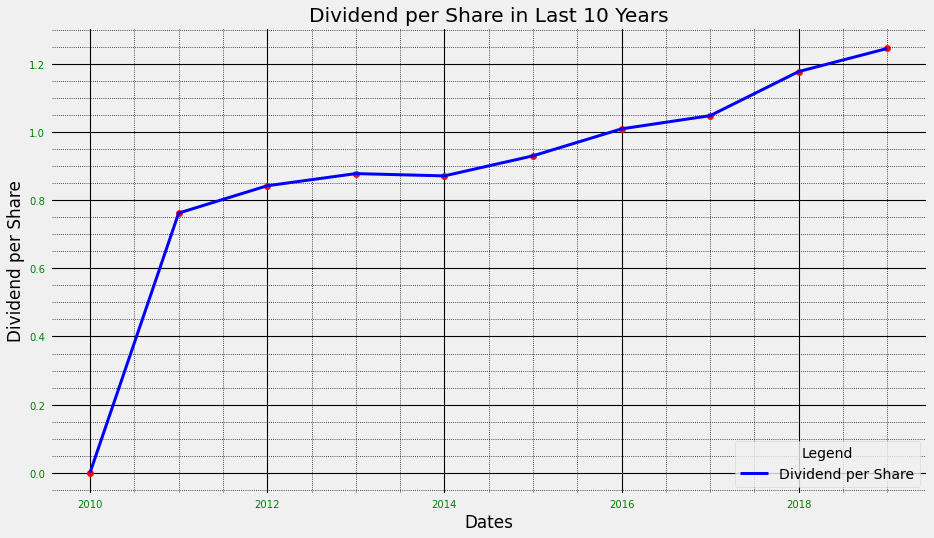

In [122]:
dividend_pershare_plot(work_table)

# Настроение и отзывы

<string>:11: GuessedAtParserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 11 of the file scored_news.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.




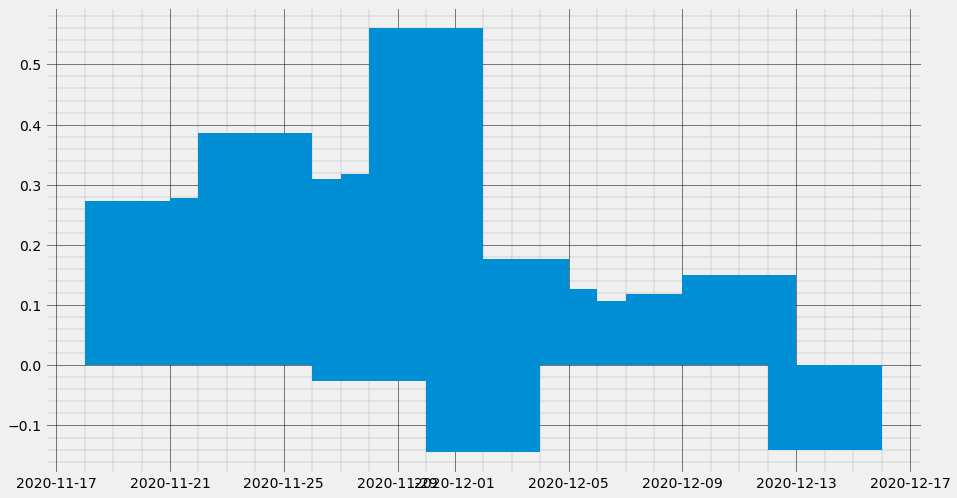

In [123]:
scored_news(COMPANY)

# Cost structure 

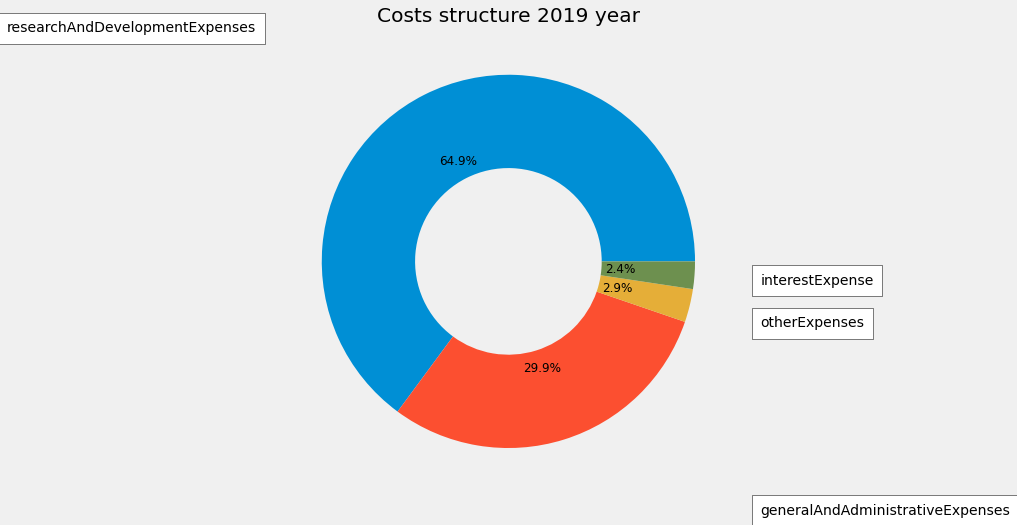

In [124]:
costs_structure = costs_structure(work_table)

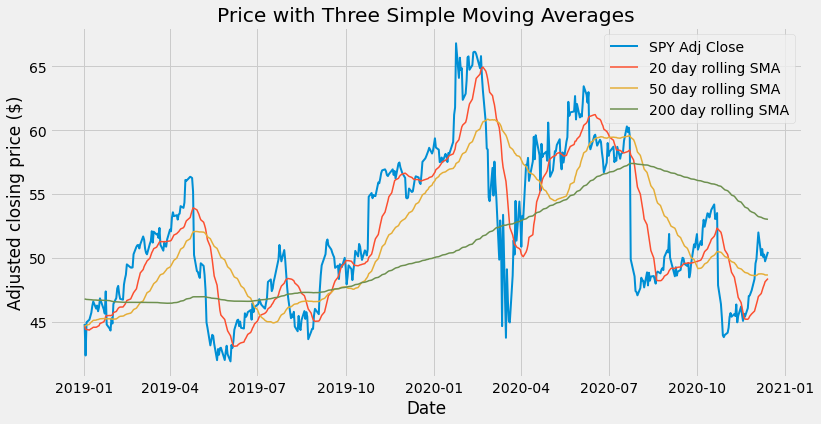

In [125]:
moving_average_plot(COMPANY)

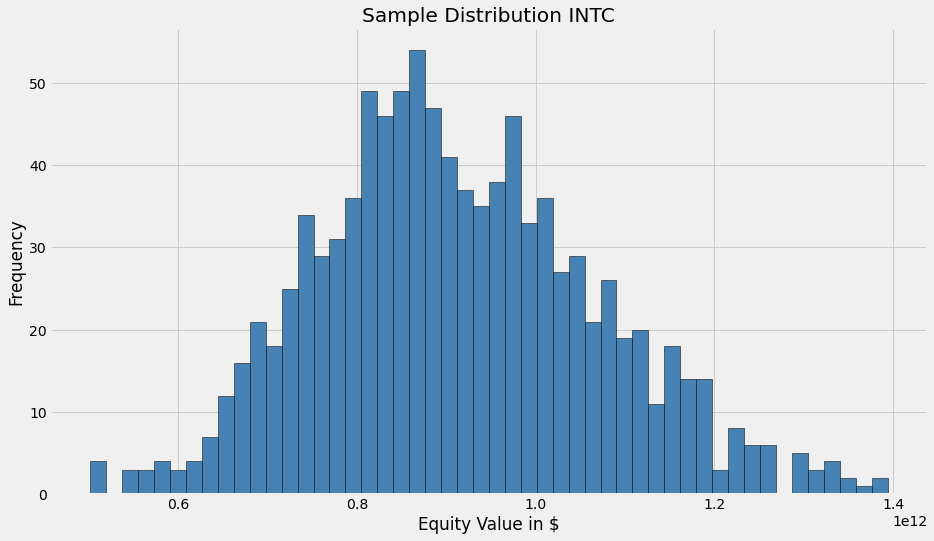

755052225133.8922
1068897407129.746


In [183]:
from yahoo_fin import stock_info as si
from matplotlib import pyplot as plt 
import pandas_datareader as dr
import numpy as np
import pandas as pd

'''----// General input variables //----'''

company_ticker = COMPANY   #задаем тикер компании, в данном случае он есть выше
market_risk_premium = 0.059  # риск инвестирования в фондовый рынок
debt_return = 0.01  # стоимость обслуживания долга, то есть платежи по обслуживанию долга составляют 1%
long_term_growth = 0.02   # долгосрочный рост, как будет расти компания после 5 лет, нужно брать этот показатель 
                        #не меньше инфляции
tax_rate = 0.3      #налоговая ставка, у него фиксированная, но лучше этот показатель расчитывать, для каждой компании. Для этого у нас есть taxRate
iterations = 1000   #количество вариантов распределения

'''----// Get financial information from yahoo finance //----'''

income_statement_df = si.get_income_statement(company_ticker)  # забирает инфу с Яхуу и формирует из нее дата фрэйм

pars_df = income_statement_df.loc[['totalRevenue', 'ebit']]   # из дата фрейма берет только выручку и операционную прибыль

input_df = pars_df.iloc[:, ::-1] # подготовка данных transponce, данные по возрастанию слева направо

'''----// Calculate average revenue CAGR & EBIT margin //----'''

def get_cagr(past_revs):
    CAGR = (past_revs.iloc[0,3]/past_revs.iloc[0,0])**(1/4)-1        # расчет CAGR: берет последнюю выручку, делит на первую выручку, возводит в степень количества годов и вычитает 1 чтобы привести к процентной размерности. Нужно попробовать расчитать это способом Рыжикова из. Экспресс Анализа
    return(CAGR)

def get_average_margin(past_ebit):  # функция расчета средней маржинальности
    margin = 0
    margin_lst = []  # создает пустой массив для расчетных данных
    for i in range(len(past_ebit.columns)):  # Запускает цикл перебора столбцов в дата фрейме
        margin = past_ebit.iloc[1,i]/past_ebit.iloc[0,i]    # делит ebit на revenue
    margin_lst.append(margin)                  # записывает расчетные данные в массив margin_lst
    return(sum(margin_lst)/len(margin_lst))   # расчитывает среднее значение массива

mean_cagr = get_cagr(input_df) # записываем данные по CAGR в переменную
mean_margin = get_average_margin(input_df)  # записываем данные по средней марже в переменную

'''----// Create forecast function through which random variables will flow //----'''

def get_forecast(input_df, cagr, margin, long_term_growth):  # функция прогноза стоимсоти на основе функции распределения, котрая ниже
    forecast_lst = []
    for i in range(6):
        if i < 5:
            forecast_lst.append(input_df.iloc[0,3]*(1+cagr)**(i+1)*margin) # не учитыется налоги, реинвестиции
        else:
            forecast_lst.append(input_df.iloc[0,3]*(1+cagr)**(i)*(1+long_term_growth)*margin)
    return forecast_lst

'''----// Get WACC and net debt //----'''

def get_wacc(company_ticker, market_risk_premium, debt_return, tax_rate):
    risk_free_rate_df = dr.DataReader('^TNX', 'yahoo') 
    risk_free_rate = (risk_free_rate_df.iloc[len(risk_free_rate_df)-1,5])/100
    equity_beta = si.get_quote_table('msft')['Beta (5Y Monthly)']
    equity_return = risk_free_rate+equity_beta*(market_risk_premium)
    balance_sheet_df = si.get_balance_sheet(company_ticker)
    short_term_debt_series = balance_sheet_df.loc['shortLongTermDebt']
    long_term_debt_series = balance_sheet_df.loc['longTermDebt']
    cash_series = balance_sheet_df.loc['cash']
    net_debt = short_term_debt_series.iloc[0] +  + long_term_debt_series.iloc[0] - cash_series.iloc[0]
    market_cap_str = si.get_quote_table(company_ticker)['Market Cap']
    market_cap_lst = market_cap_str.split('.')

    if market_cap_str[len(market_cap_str)-1] == 'T':
        market_cap_length = len(market_cap_lst[1])-1
        market_cap_lst[1] = market_cap_lst[1].replace('T',(12-market_cap_length)*'0')
        market_cap = int(''.join(market_cap_lst))

    if market_cap_str[len(market_cap_str)-1] == 'B':
        market_cap_length = len(market_cap_lst[1])-1
        market_cap_lst[1] = market_cap_lst[1].replace('B',(9-market_cap_length)*'0')
        market_cap = int(''.join(market_cap_lst))

    company_value = market_cap + net_debt
    WACC1 = market_cap/company_value * equity_return + net_debt/company_value * debt_return * (1-tax_rate)
   ### return WACC1
    return market_cap_lst, WACC1, market_cap_str

def get_net_debt():
    
    balance_sheet_df = si.get_balance_sheet(company_ticker)
    short_term_debt_series = balance_sheet_df.loc['shortLongTermDebt']
    long_term_debt_series = balance_sheet_df.loc['longTermDebt']
    cash_series = balance_sheet_df.loc['cash']

    return short_term_debt_series.iloc[0] + long_term_debt_series.iloc[0] - cash_series.iloc[0]
    
mean_wacc = WACC

net_debt = get_net_debt()

'''----// Discount EBIT figures to arrive at the PV of the firm's cash flows //----'''

def discount(forecast, discount_rate, long_term_rate):
    discount_lst = []
    for x,i in enumerate(forecast):
        if x < 5:
            discount_lst.append(i/(1+discount_rate)**(x+1))
        else:
            discount_lst.append(i/(discount_rate-long_term_rate)*(1/(1+discount_rate)**5))
    return sum(discount_lst)

'''----// Run simulation and plot distribution of model forecasts //----'''

hist_lst = []

for i in range(iterations):
    cagr = np.random.normal(mean_cagr, 0.02) # отклонение взято в 1 процент, но можно расчитывать отклонение по предыдущим историческим данным
    margin = np.random.normal(mean_margin, 0.04) # отклонение взято в 0,5 процента, но можно расчитывать отклонение по предыдущим историческим данным
    long_term_rate = np.random.normal(long_term_growth, 0.001) # сам long_term_growth доолжен быть в размере инфляции, а его отклонение так и оставляем 
    discount_rate = np.random.normal(mean_wacc, 0.001)# тут так и оставляем
    forecast = get_forecast(input_df, cagr, margin, long_term_rate) 
    hist_lst.append(discount(forecast, discount_rate, long_term_rate)-net_debt) # для повышения точности сюда нужно прибавлять кэш или current assets
hist_array = np.array(hist_lst)
plt.hist(hist_array, bins=50, align='mid', color = 'steelblue', edgecolor='black')
plt.title('Sample Distribution ' + company_ticker, {'fontname':'Calibri'})
plt.xlabel('Equity Value in $', {'fontname':'Calibri'})
plt.ylabel('Frequency', {'fontname':'Calibri'})

plt.show()

mean = hist_array.mean()
standard_error = hist_array.std() # лучше использовать чистое стандартное отклонение
#standard_error = hist_array.std()/(iterations**(1/2)) Это был его вариант, он зачемто принудительно уменьшает стандарное отклонение в 100 раз из-за этого его расчетные значения почти не отклоняются от среднего, а значит в это выборку попадает до 10% результатов

lower_bound = mean-standard_error
upper_bound = mean+standard_error 

print(lower_bound)
print(upper_bound)

In [187]:
lower_bound1 = lower_bound/(work_table['numberOfShares'][0])
upper_bound1 = upper_bound/(work_table['numberOfShares'][0])
mean1 = mean/(work_table['numberOfShares'][0])
standard_error1 = standard_error/(work_table['numberOfShares'][0])
print(lower_bound1)
print(upper_bound1)
print(mean1)
print(standard_error1)

170.9423194779018
241.9962434072325
206.46928144256714
35.52696196466536


In [144]:
print(f'WACC {WACC}')
print(f'Gordon price {Gordon}')
print(f'PRICE_model FCF regresion {PRICE_model}')
print(f'current market PRICE {current_PRICE}')
print(f'KE {ke}')

WACC 0.04796003613257473
Gordon price 17.68809822265499
PRICE_model FCF regresion 118.18
current market PRICE 50.47
KE 0.0514738429467524


In [145]:
print(pars_df)

endDate        2019-12-28   2018-12-29   2017-12-30   2016-12-31
Breakdown                                                       
totalRevenue  71965000000  70848000000  62761000000  59387000000
ebit          22428000000  23244000000  18434000000  15005000000


In [146]:
print(input_df)

endDate        2016-12-31   2017-12-30   2018-12-29   2019-12-28
Breakdown                                                       
totalRevenue  59387000000  62761000000  70848000000  71965000000
ebit          15005000000  18434000000  23244000000  22428000000


In [147]:
print(mean_margin)

0.31165149725561037


In [148]:
print(margin)

0.3122997883678856


In [149]:
forecast_lst1 = get_forecast(input_df, cagr, margin, long_term_growth)
print(forecast_lst1)

[23564406865.62484, 24706999460.833267, 25904994165.08139, 27161077319.67662, 28478065521.430077, 28762846176.64438]


In [152]:
print(get_wacc(company_ticker, market_risk_premium, debt_return, tax_rate))

(['206', '826000000'], 0.05191306437526238, '206.826B')


In [156]:
print(discount(forecast, discount_rate, long_term_rate))

(656327413195.3156, [21864976166.523888, 21731626432.555164, 21599089969.610104, 21467361817.725643, 21336437047.18841, 548327921761.71234])


In [158]:
print(discount(forecast, discount_rate, long_term_rate))

(1035903155077.9159, [22938544943.601826, 23433607628.81667, 23939354821.828087, 24456017117.084564, 24983830085.754192, 916151800480.8306])


In [162]:
print(mean_cagr)

0.049198076418119685


In [168]:
print(get_average_margin(past_ebit))


NameError: name 'past_ebit' is not defined